✅ **geometric intuition behind PCA**

---

**Principal Component Analysis (PCA)** is a technique for **dimensionality reduction**, used to convert a high-dimensional dataset into a lower dimension while **preserving as much variance (information) as possible**.

### 📌 Key points:

* Given data with two correlated features (like **size of house** and **number of rooms**), the data points lie along a diagonal line.

* If we naively **project** data onto the X-axis (say, just keep "size"), we reduce dimensions but **lose information** about "number of rooms".

* The **spread (variance)** tells us how much information is retained. Greater spread along an axis means more variance (more information captured).

* PCA does a **rotation (via eigen decomposition)** to find new axes:

  * **PC1 (Principal Component 1)**: direction with maximum variance.
  * **PC2**: next direction, orthogonal to PC1, with next highest variance.

* After this transformation:

  * Projecting onto **PC1** captures the most variance with **minimal information loss**.
  * Remaining variance is small along PC2.

* This way, reducing from 2D to 1D using **PC1** keeps most of the important information.

---

✅ **Summary diagram:**

I’ll generate a Python matplotlib plot that visually demonstrates:

1. Original data
2. Naive projection on X-axis
3. PCA finding PC1 & PC2
4. Projection on PC1 retaining maximum variance

---

## 🚀 Python code to generate the plots


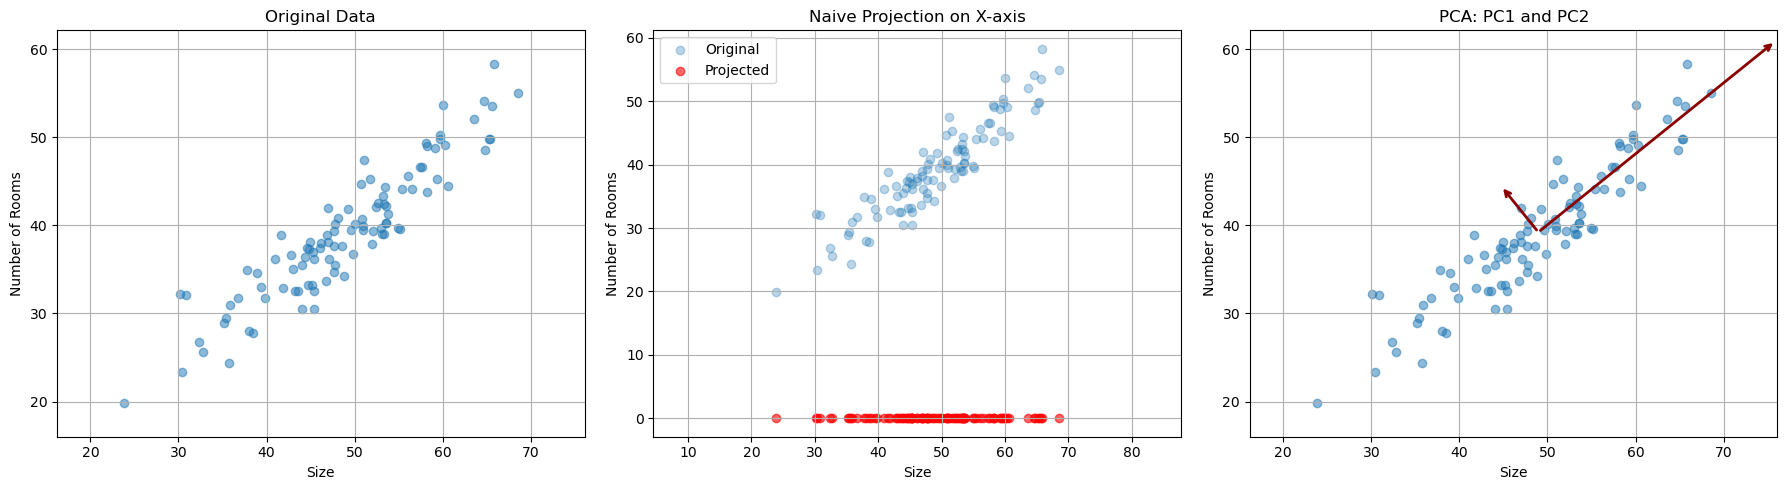

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create synthetic data
np.random.seed(42)
size = np.random.normal(50, 10, 100)
rooms = size * 0.8 + np.random.normal(0, 3, 100)
X = np.column_stack((size, rooms))

# Run PCA
pca = PCA(n_components=2)
pca.fit(X)
mean = pca.mean_
components = pca.components_
explained_var = pca.explained_variance_

# Helper to plot arrow
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color='darkred')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(18,5))

# -----------------
# Plot 1: Original Data
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('Original Data')
plt.axis('equal')
plt.grid(True)

# -----------------
# Plot 2: Naive Projection on X-axis
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], alpha=0.3, label='Original')
plt.scatter(X[:,0], np.zeros_like(X[:,0]), color='r', alpha=0.6, label='Projected')
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('Naive Projection on X-axis')
plt.legend()
plt.axis('equal')
plt.grid(True)

# -----------------
# Plot 3: PCA axes & projection on PC1
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
# Draw principal components
for l, vec in zip(explained_var, components):
    draw_vector(mean, mean + vec * 3 * np.sqrt(l))
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('PCA: PC1 and PC2')
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()



---

✅ **What this does:**

* 📌 **Left plot:** shows original data with clear correlation.
* 📌 **Middle plot:** naive projection on X-axis loses info about rooms (spread in Y direction lost).
* 📌 **Right plot:** shows PCA’s rotated axes (PC1 & PC2). PC1 captures most variance. Projecting on PC1 keeps maximum info.

---

🎯 **Next step:**
If you’d like, we can also generate a **4th plot**, projecting data on PC1 and reconstructing to see how it looks, or even do a **3D example** to show PC1, PC2, PC3. Just tell me!


✅ **Geometric intuition behind PCA**

---

**Principal Component Analysis (PCA)** is a technique for **dimensionality reduction**, used to convert a high-dimensional dataset into a lower dimension while **preserving as much variance (information) as possible**.

### 📌 Key points:

* Given data with two correlated features (like **size of house** and **number of rooms**), the data points lie along a diagonal line.

* If we naively **project** data onto the X-axis (say, just keep "size"), we reduce dimensions but **lose information** about "number of rooms".

* The **spread (variance)** tells us how much information is retained. Greater spread along an axis means more variance (more information captured).

* PCA does a **rotation (via eigen decomposition)** to find new axes:

  * **PC1 (Principal Component 1)**: direction with maximum variance.
  * **PC2**: next direction, orthogonal to PC1, with next highest variance.

* After this transformation:

  * Projecting onto **PC1** captures the most variance with **minimal information loss**.
  * Remaining variance is small along PC2.

* This way, reducing from 2D to 1D using **PC1** keeps most of the important information.

---

✅ **Summary diagram:**

I’ll generate a Python matplotlib plot that visually demonstrates:

1. Original data
2. Naive projection on X-axis
3. PCA finding PC1 & PC2
4. Projection on PC1 retaining maximum variance

---

## 🚀 Python code to generate the plots

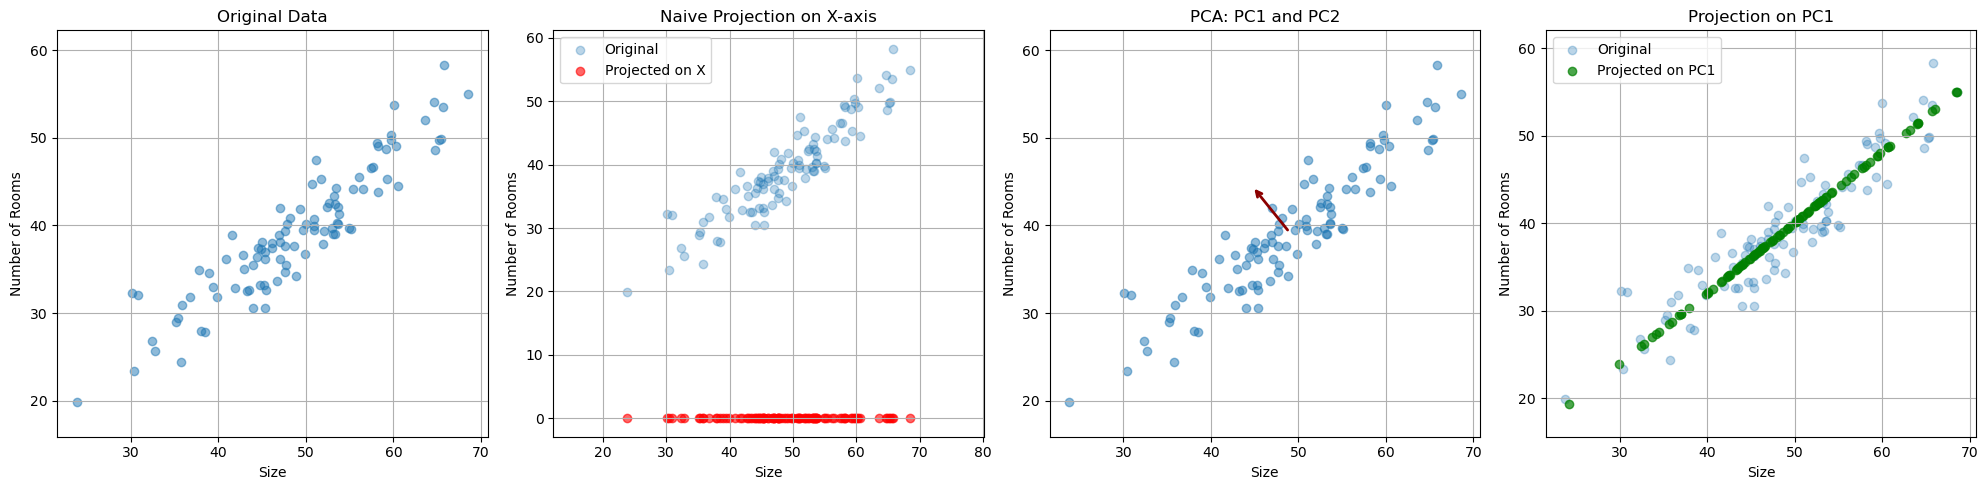

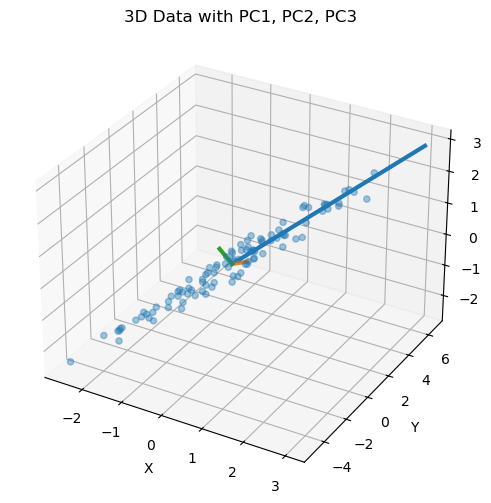

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# ========================
# 2D Example
# ========================
np.random.seed(42)
size = np.random.normal(50, 10, 100)
rooms = size * 0.8 + np.random.normal(0, 3, 100)
X = np.column_stack((size, rooms))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
mean = pca.mean_
components = pca.components_
explained_var = pca.explained_variance_

def draw_vector(v0, v1, ax=None, **kwargs):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color=kwargs.get('color', 'darkred'))
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(20,5))

# -----------------
# Plot 1: Original Data
plt.subplot(1,4,1)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('Original Data')
plt.axis('equal')
plt.grid(True)

# -----------------
# Plot 2: Naive projection on X-axis
plt.subplot(1,4,2)
plt.scatter(X[:,0], X[:,1], alpha=0.3, label='Original')
plt.scatter(X[:,0], np.zeros_like(X[:,0]), color='r', alpha=0.6, label='Projected on X')
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('Naive Projection on X-axis')
plt.legend()
plt.axis('equal')
plt.grid(True)

# -----------------
# Plot 3: PCA axes
plt.subplot(1,4,3)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for l, vec in zip(explained_var, components):
    draw_vector(mean, mean + vec * 3 * np.sqrt(l))
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('PCA: PC1 and PC2')
plt.axis('equal')
plt.grid(True)

# -----------------
# Plot 4: Projection on PC1 line
plt.subplot(1,4,4)
# Reconstruct projected points
X_reconstructed = np.outer(X_pca[:,0], pca.components_[0]) + pca.mean_
plt.scatter(X[:,0], X[:,1], alpha=0.3, label='Original')
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], color='g', alpha=0.7, label='Projected on PC1')
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.title('Projection on PC1')
plt.legend()
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()


# ========================
# 3D Example with PCA
# ========================
from mpl_toolkits.mplot3d import proj3d

# Create 3D data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.5, 100)
z = 0.5 * x + 0.2 * y + np.random.normal(0, 0.2, 100)
X_3d = np.column_stack((x, y, z))

# PCA in 3D
pca3d = PCA(n_components=3)
pca3d.fit(X_3d)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], alpha=0.4)

# Draw PC1, PC2, PC3
mean3d = pca3d.mean_
for length, vector in zip(pca3d.explained_variance_, pca3d.components_):
    v = vector * 3 * np.sqrt(length)
    ax.plot([mean3d[0], mean3d[0]+v[0]],
            [mean3d[1], mean3d[1]+v[1]],
            [mean3d[2], mean3d[2]+v[2]], linewidth=3)

ax.set_title('3D Data with PC1, PC2, PC3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



## ✍️ Explanation of results

✅ **Plot 1:** Original data in 2D (size vs rooms)
✅ **Plot 2:** Naive projection on X (information lost in number of rooms)
✅ **Plot 3:** PCA finds rotated axes PC1 & PC2. You see arrows showing directions of maximum variance.
✅ **Plot 4:** Data projected on **PC1**, clearly aligned on best line capturing maximum variance.

✅ **3D plot:** Shows synthetic 3D data. The three principal components are drawn as lines starting from the mean, capturing variance in descending order:

* **PC1:** captures maximum variance
* **PC2:** next
* **PC3:** least

---

🎯 **Done!**
If you want, we can also **animate** the projection (with matplotlib animation) or **color by PC1 values** to see gradient along principal components. Just tell me! 🚀
